In [1]:
from face_detection.face_detection import get_circle_bounding_box_for_image
from face_alignment.utility import *
from face_alignment.alignment import * 

from matplotlib.patches import Circle
import scipy.optimize as opt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
img = create_test_triplets()


C:\Users\ander\Documents\DTU\Fall 2021\Advanced Machine Learning\face_alignment\face_alignment\utility.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(triplets)


In [3]:
import pickle
with open('train_1', 'wb') as f:
    pickle.dump(img, f)

In [5]:
mean_shape = compute_mean_shape(img)

In [6]:
aligned_mean_shape = center_shape(mean_shape)

## Show Mean Shape and Features

In [7]:
#x_mean_shape =  [x[0] for x in aligned_mean_shape]
#y_mean_shape =  [x[1] for x in aligned_mean_shape]

features = extract_coords_from_mean_shape(aligned_mean_shape, offset=50, n=10)

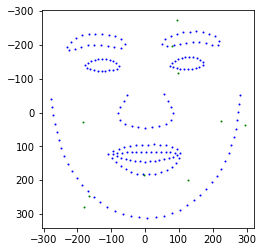

In [9]:
plt.scatter(aligned_mean_shape[:,0],aligned_mean_shape[:,1], s = 1, color='b')
#plt.scatter(img1[:,0] ,img1[:,1], s = 1, color='r')

plt.scatter(features[:,0],features[:,1], s = 1, color='g')
#plt.scatter(x,y, s = 1)


plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Find closest Landmark and show this

In [52]:
def find_closest_landmark(feature, landmarks):
    
    min_distance = sys.float_info.max
    closest_landmark = -1

    for index, landmark in enumerate(landmarks): 
            distance = np.linalg.norm( landmark - feature)

            if distance < min_distance:
                min_distance = distance 
                closest_landmark = index
                
    return closest_landmark

In [53]:
#Make a list of closest landmarks to each feature

def gen_list_of_closest_landmarks(features, landmarks):
    closest_landmarks = []

    for feature in features:
        closest_landmarks.append(find_closest_landmark(feature, landmarks))
        
    return closest_landmarks
    

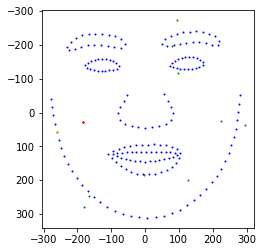

In [51]:
#Test that finding closest landmark function works

feature = features[3]

closest_landmark = aligned_mean_shape[find_closest_landmark(feature,aligned_mean_shape)]
            
plt.scatter(aligned_mean_shape[:,0],aligned_mean_shape[:,1], s = 1, color='b')
#plt.scatter(img1[:,0] ,img1[:,1], s = 1, color='r')

plt.scatter(features[:,0],features[:,1], s = 1, color='g')
#plt.scatter(x,y, s = 1)

plt.scatter(closest_landmark[0],closest_landmark[1],color='orange',s=2)
plt.scatter(feature[0],feature[1],color='r',s=2)

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Introduce new image to use for warping features to

In [137]:
# Extreme transformation for debugging
#img1 = np.dot(center_shape(img[0][1])*0.6, rotate_matrix(1)) 

img1 = center_shape(img[0][1])

<ipython-input-138-5e704b71763f>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


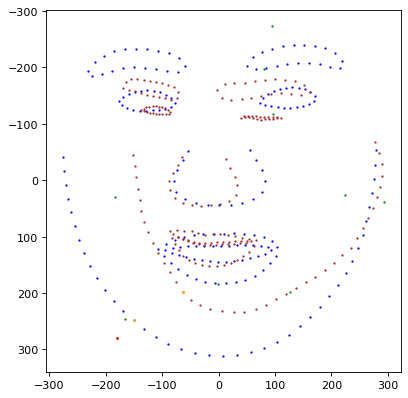

In [138]:
#Test that finding closest landmark function works

fig = plt.figure(figsize=(8, 6), dpi=80)

feature = features[2]

closest_landmark = aligned_mean_shape[find_closest_landmark(feature,aligned_mean_shape)]

closest_landmark_img1 = img1[find_closest_landmark(feature,aligned_mean_shape)]
            
plt.scatter(aligned_mean_shape[:,0],aligned_mean_shape[:,1], s = 1, color='b')

plt.scatter(img1[:,0] ,img1[:,1], s = 1, color='brown')

plt.scatter(features[:,0],features[:,1], s = 1, color='g')
#plt.scatter(x,y, s = 1)



plt.scatter(closest_landmark[0],closest_landmark[1],color='orange',s=2)
plt.scatter(closest_landmark_img1[0],closest_landmark_img1[1],color='orange',s=2)

plt.scatter(feature[0],feature[1],color='r',s=2)

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
fig.show()

### Calculate transformation from mean shape to img1 

In [139]:
feature = features[2]

In [140]:
opt = optimize_equation_8(img1, aligned_mean_shape)

R = rotate_matrix(opt[1])
scale = opt[0]

warped_mean_shape = np.dot(aligned_mean_shape*scale, R)

Optimization terminated successfully.
         Current function value: 1515911.749774
         Iterations: 66
         Function evaluations: 126


<ipython-input-141-3cce48281829>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


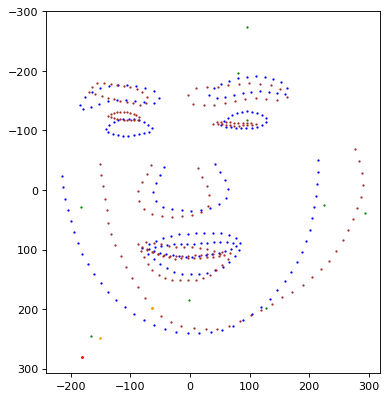

In [141]:
fig = plt.figure(figsize=(8, 6), dpi=80)



closest_landmark = aligned_mean_shape[find_closest_landmark(feature,aligned_mean_shape)]

closest_landmark_img1 = img1[find_closest_landmark(feature,aligned_mean_shape)]
            
plt.scatter(warped_mean_shape[:,0],warped_mean_shape[:,1], s = 1, color='b')

plt.scatter(img1[:,0] ,img1[:,1], s = 1, color='brown')

plt.scatter(features[:,0],features[:,1], s = 1, color='g')
#plt.scatter(x,y, s = 1)


plt.scatter(closest_landmark[0],closest_landmark[1],color='orange',s=2)
plt.scatter(closest_landmark_img1[0],closest_landmark_img1[1],color='orange',s=2)

plt.scatter(feature[0],feature[1],color='r',s=2)

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
fig.show()

In [142]:
#Find offsets 
closest_landmarks = gen_list_of_closest_landmarks(features, aligned_mean_shape)
landmarks_positions = np.array([list(aligned_mean_shape[i]) for i in closest_landmarks ])
offsets = features - landmarks_positions

In [143]:
transformed_feature = img1[find_closest_landmark(feature,aligned_mean_shape)] + np.dot(offsets[2]*scale, R)

<ipython-input-144-3e997f5ad5ce>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


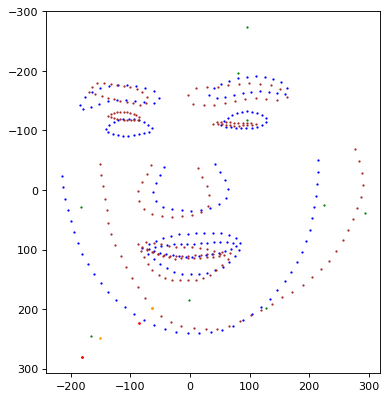

In [144]:
fig = plt.figure(figsize=(8, 6), dpi=80)


closest_landmark = aligned_mean_shape[find_closest_landmark(feature,aligned_mean_shape)]

closest_landmark_img1 = img1[find_closest_landmark(feature,aligned_mean_shape)]
            
plt.scatter(warped_mean_shape[:,0],warped_mean_shape[:,1], s = 1, color='b')

plt.scatter(img1[:,0] ,img1[:,1], s = 1, color='brown')

plt.scatter(features[:,0],features[:,1], s = 1, color='g')
#plt.scatter(x,y, s = 1)



plt.scatter(closest_landmark[0],closest_landmark[1],color='orange',s=2)
plt.scatter(closest_landmark_img1[0],closest_landmark_img1[1],color='orange',s=2)

plt.scatter(feature[0],feature[1],color='r',s=2)
plt.scatter(transformed_feature[0],transformed_feature[1],color='r',s=2)


plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
fig.show()

In [145]:
closest_landmarks

[132, 157, 13, 4, 27, 172, 12, 37, 79, 37]

In [146]:
landmarks_positions_img1 = np.array([list(img1[i]) for i in closest_landmarks ])

In [147]:
transformed_features = landmarks_positions_img1 + np.dot(offsets*scale, R)

<ipython-input-148-4da601a688f7>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


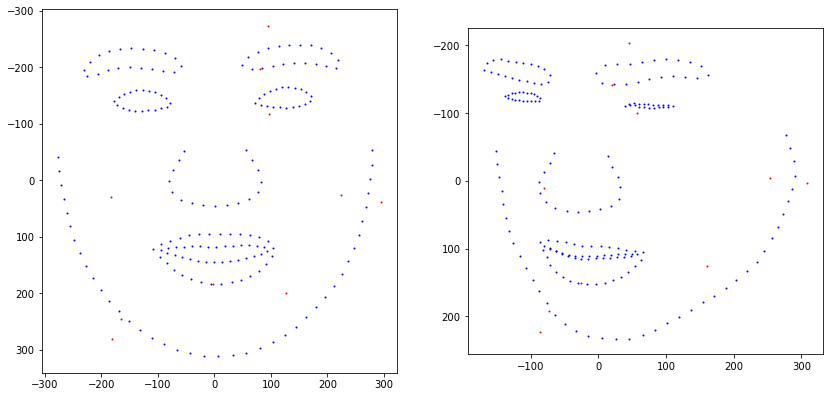

In [148]:
fig = plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.scatter(aligned_mean_shape[:,0],aligned_mean_shape[:,1], s = 1, color='b')
plt.scatter(features[:,0],features[:,1], s = 1, color='r')


plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')



plt.subplot(1, 2, 2) # index 2
plt.scatter(img1[:,0], img1[:,1], s = 1, color='b')
plt.scatter(transformed_features[:,0],transformed_features[:,1], s = 1, color='r')

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')

fig.show()

In [ ]:
s0 = center_shape(mean_shape)
features0 = extract_coords_from_mean_shape(aligned_mean_shape, offset=50, n=10)

In [149]:
def transform_features(s0, s1, features0):
    #Takes a set of landmarks s0 with a corresponding set of features features0 and warps these features to fit on
    #the set of landmarks given by s1. 
    
    #Assumption: Both sets of landmarks s0 and s1 are centered when given as input
    
    opt = optimize_equation_8(s1, s0)
    R = rotate_matrix(opt[1])
    scale = opt[0]
    
    closest_landmarks = gen_list_of_closest_landmarks(features0, s0)
    landmarks_positions = np.array([list(s0[i]) for i in closest_landmarks ])
    offsets = features0 - landmarks_positions
    
    landmarks_positions_img1 = np.array([list(img1[i]) for i in closest_landmarks ])
    features1 = landmarks_positions_img1 + np.dot(offsets*scale, R)
    
    return features1 
    


In [46]:
opt = optimize_equation_8(img1, aligned_mean_shape)

Optimization terminated successfully.
         Current function value: 700585.200316
         Iterations: 77
         Function evaluations: 143


In [47]:
opt

array([ 0.69023638, -0.01826654])

In [48]:
R = rotate_matrix(opt[1])
scale = opt[0]

In [55]:
# Features converted globally 
features = np.dot(features*scale, R)

#Features converted locally



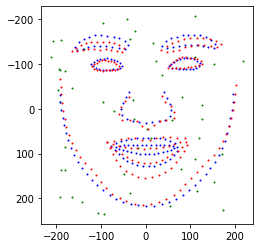

In [56]:
#plt.scatter(x_mean_shape,y_mean_shape, s = 1, color='b')
alined_mean_shape = np.dot(aligned_mean_shape*scale, R)
plt.scatter(features[:,0],features[:,1], s = 1, color='g')
plt.scatter(alined_mean_shape[:,0] ,alined_mean_shape[:,1], s = 1, color='b')

plt.scatter(img1[:,0] ,img1[:,1], s = 1, color='r')


plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [25]:
img1 = align_shapes(img[0][1], img[0][1])
img2 = align_shapes(img[1][1], img[1][1])

x =  [x[0] for x in img1]
y =  [x[1] for x in img1]

x1 =  [x[0] for x in img2]
y1 =  [x[1] for x in img2]

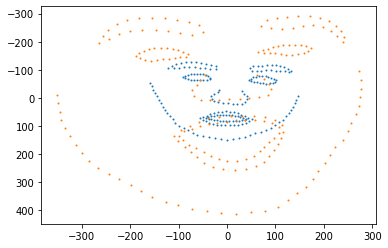

In [26]:
plt.scatter(x,y, s = 1)
plt.scatter(x1,y1,s = 1)
plt.gca().invert_yaxis()
plt.show()

In [27]:
res = optimize_equation_8(img1, img2)

here
Optimization terminated successfully.
         Current function value: 890123.018229
         Iterations: 70
         Function evaluations: 135
here1


In [28]:
scale, theta = res

In [31]:
i = np.dot(img2*scale, rotate_matrix(theta))

In [32]:
x1 =  [x[0] for x in i]
y1 =  [x[1] for x in i]

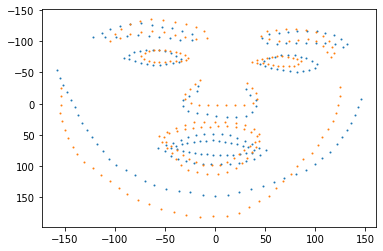

In [33]:
plt.scatter(x,y, s = 1)
plt.scatter(x1,y1,s = 1)
plt.gca().invert_yaxis()
plt.show()

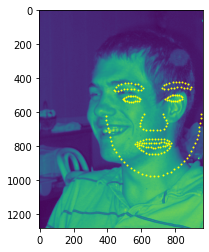

In [55]:
plot_image_given_coords("10697993_1.jpg",[mean_shape])


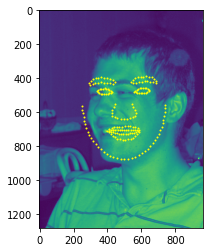

In [56]:
plot_image_given_coords("10697993_1.jpg",[aligned])

In [ ]:
def fit_regression_tree(r_ik):
    '''
    pesudo code for part b of algorithm 1
    
    '''
    #
    # Tree: - set of node splits 
    #       - leafs containing average r_ik
    #       - points for comparing
    
    #build tree
    #for i in range(depth_tree, current_shape):
   #todo  #   warp_new_coord_sytem()
   #todo  #   a)   type:float theta  = generate_split()
     #   a.1) type: point  = find points_from_image()
     #   
    # go_through_I_and_update_leafs()
    # put r_ik in leafs and average

In [ ]:
def learn_regressor():
    
    '''
    pseudo code for algorithm 1
    
    '''
    
    # type [tuple(float, float) ]: point
    
 #done   #1) type: List[ (List[images], List[points], List[floats]) ]:  create_train_data()
                    #Images        #Shape         #Delta
        
  #todo  #2) type: List[floats]: find_mean_delta_values()
    
    #3) for k in range(num_regression_trees): 
            # for i in (size_training_data):
                    # type: List[floats] r_ik = current_delta_values_of_image_i - accumulative result of k-1 regression trees
                    # fit_tree() based on r_ik
                
    
    #4)        update accumulative result
    
    #5) return accumulative value
    
    

In [ ]:
#
# todo: extract features (choose x amount of pixels based on prior distribution (uniform))
#